#### Gorsse 2018 database
Gorsse_Data in Brief 21 (2018) 2664–2678_Database on the mechanical properties of high entropy alloys and complex concentrated alloys_10.1016/j.dib.2018.11.111  
google sheets: https://docs.google.com/spreadsheets/d/1jFeJPJOKPW2i-xa2iE_IGlFDvCO2pHkDKnDrp8E45l0/edit?gid=0#gid=0  
Modificação: Adicionar porcentagem atômica

In [2]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Database_Gorsse_2018_adapt.csv")
df.head()

,Unnamed: 0,Nome,Co,Fe,Ni,Si,Al,Cr,Mo,Nb,...,W,Ref.,Type of phases,r# (g/cm3),HV,Type of tests,sy (MPa),smax (MPa),e (%),E# (GPa)
0,0,CoFeNi,33.333333,33.333333,33.333333,NaN,NaN,NaN,NaN,NaN,...,NaN,4,FCC,8.5,125.0,C,204.0,NaN,NaN,207.0
1,1,CoFeNi,33.333333,33.333333,33.333333,NaN,NaN,NaN,NaN,NaN,...,NaN,4,FCC,8.5,125.0,C,209.0,NaN,NaN,207.0
2,2,CoFeNi,33.333333,33.333333,33.333333,NaN,NaN,NaN,NaN,NaN,...,NaN,5,FCC,8.5,NaN,T,211.0,513.0,31,207.0
3,3,CoFeNiSi0.25,30.769231,30.769231,30.769231,7.692308,NaN,NaN,NaN,NaN,...,NaN,4,FCC,7.7,149.0,C,196.0,NaN,NaN,194.0
4,4,CoFeNiSi0.5,28.571429,28.571429,28.571429,14.285714,NaN,NaN,NaN,NaN,...,NaN,4,FCC + Im,7.1,287.0,C,476.0,NaN,NaN,NaN


#### Limpeza
- Dropar primeira coluna e de Ref
- trocar nomes de colunas

In [3]:
# Drop primeira coluna e ref
df.drop(labels = ["Unnamed: 0", "Ref."], axis=1, inplace = True)
df

,Nome,Co,Fe,Ni,Si,Al,Cr,Mo,Nb,Ti,...,Ta,W,Type of phases,r# (g/cm3),HV,Type of tests,sy (MPa),smax (MPa),e (%),E# (GPa)
0,CoFeNi,33.333333,33.333333,33.333333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,FCC,8.5,125.0,C,204.0,NaN,NaN,207.0
1,CoFeNi,33.333333,33.333333,33.333333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,FCC,8.5,125.0,C,209.0,NaN,NaN,207.0
2,CoFeNi,33.333333,33.333333,33.333333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,FCC,8.5,NaN,T,211.0,513.0,31,207.0
3,CoFeNiSi0.25,30.769231,30.769231,30.769231,7.692308,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,FCC,7.7,149.0,C,196.0,NaN,NaN,194.0
4,CoFeNiSi0.5,28.571429,28.571429,28.571429,14.285714,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,FCC + Im,7.1,287.0,C,476.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,CoFeMoNi1.8V,17.241379,17.241379,31.034483,NaN,NaN,NaN,17.241379,NaN,NaN,...,NaN,NaN,FCC + Im,8.5,510.0,NaN,NaN,NaN,NaN,NaN
353,CoFeMoNi2V,16.666667,16.666667,33.333333,NaN,NaN,NaN,16.666667,NaN,NaN,...,NaN,NaN,FCC + Im,8.5,382.0,NaN,NaN,NaN,NaN,NaN
354,CoFeMoNiTiVZr,14.285714,14.285714,14.285714,NaN,NaN,NaN,14.285714,NaN,14.285714,...,NaN,NaN,NaN,7.3,790.0,NaN,NaN,NaN,NaN,NaN
355,CuFeNiTiVZr,NaN,16.666667,16.666667,NaN,NaN,NaN,NaN,NaN,16.666667,...,NaN,NaN,NaN,6.8,590.0,NaN,NaN,NaN,NaN,142.0


In [4]:
# renomear algumas colunas
columns = {'Type of phases':'phases',
          'r# (g/cm3)':'ro',
          'Type of tests':'test',
          'sy (MPa)':"YS",
          'smax (MPa)':'UTS',
          'e (%)':'elong',
          'E# (GPa)':'E'}
df.rename(columns = columns,inplace=True)
df

,Nome,Co,Fe,Ni,Si,Al,Cr,Mo,Nb,Ti,...,Ta,W,phases,ro,HV,test,YS,UTS,elong,E
0,CoFeNi,33.333333,33.333333,33.333333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,FCC,8.5,125.0,C,204.0,NaN,NaN,207.0
1,CoFeNi,33.333333,33.333333,33.333333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,FCC,8.5,125.0,C,209.0,NaN,NaN,207.0
2,CoFeNi,33.333333,33.333333,33.333333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,FCC,8.5,NaN,T,211.0,513.0,31,207.0
3,CoFeNiSi0.25,30.769231,30.769231,30.769231,7.692308,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,FCC,7.7,149.0,C,196.0,NaN,NaN,194.0
4,CoFeNiSi0.5,28.571429,28.571429,28.571429,14.285714,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,FCC + Im,7.1,287.0,C,476.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,CoFeMoNi1.8V,17.241379,17.241379,31.034483,NaN,NaN,NaN,17.241379,NaN,NaN,...,NaN,NaN,FCC + Im,8.5,510.0,NaN,NaN,NaN,NaN,NaN
353,CoFeMoNi2V,16.666667,16.666667,33.333333,NaN,NaN,NaN,16.666667,NaN,NaN,...,NaN,NaN,FCC + Im,8.5,382.0,NaN,NaN,NaN,NaN,NaN
354,CoFeMoNiTiVZr,14.285714,14.285714,14.285714,NaN,NaN,NaN,14.285714,NaN,14.285714,...,NaN,NaN,NaN,7.3,790.0,NaN,NaN,NaN,NaN,NaN
355,CuFeNiTiVZr,NaN,16.666667,16.666667,NaN,NaN,NaN,NaN,NaN,16.666667,...,NaN,NaN,NaN,6.8,590.0,NaN,NaN,NaN,NaN,142.0


#### EDA
Todos são features e YS é o target

In [5]:
# Criar nova feature - Specific Strength
df["SpecStrength"] = df["YS"]/df["ro"]
df

,Nome,Co,Fe,Ni,Si,Al,Cr,Mo,Nb,Ti,...,W,phases,ro,HV,test,YS,UTS,elong,E,SpecStrength
0,CoFeNi,33.333333,33.333333,33.333333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,FCC,8.5,125.0,C,204.0,NaN,NaN,207.0,24.000000
1,CoFeNi,33.333333,33.333333,33.333333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,FCC,8.5,125.0,C,209.0,NaN,NaN,207.0,24.588235
2,CoFeNi,33.333333,33.333333,33.333333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,FCC,8.5,NaN,T,211.0,513.0,31,207.0,24.823529
3,CoFeNiSi0.25,30.769231,30.769231,30.769231,7.692308,NaN,NaN,NaN,NaN,NaN,...,NaN,FCC,7.7,149.0,C,196.0,NaN,NaN,194.0,25.454545
4,CoFeNiSi0.5,28.571429,28.571429,28.571429,14.285714,NaN,NaN,NaN,NaN,NaN,...,NaN,FCC + Im,7.1,287.0,C,476.0,NaN,NaN,NaN,67.042254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,CoFeMoNi1.8V,17.241379,17.241379,31.034483,NaN,NaN,NaN,17.241379,NaN,NaN,...,NaN,FCC + Im,8.5,510.0,NaN,NaN,NaN,NaN,NaN,NaN
353,CoFeMoNi2V,16.666667,16.666667,33.333333,NaN,NaN,NaN,16.666667,NaN,NaN,...,NaN,FCC + Im,8.5,382.0,NaN,NaN,NaN,NaN,NaN,NaN
354,CoFeMoNiTiVZr,14.285714,14.285714,14.285714,NaN,NaN,NaN,14.285714,NaN,14.285714,...,NaN,NaN,7.3,790.0,NaN,NaN,NaN,NaN,NaN,NaN
355,CuFeNiTiVZr,NaN,16.666667,16.666667,NaN,NaN,NaN,NaN,NaN,16.666667,...,NaN,NaN,6.8,590.0,NaN,NaN,NaN,NaN,142.0,NaN


In [6]:
# Para as colunas com as porcentagens atômicas, os valores nulos sõa substituídos por Zero
elements = df.columns.values.tolist()[1:25]
df[elements] = df[elements].fillna(0)

In [7]:
# Uma das variáveis categóricas é 'phases'. Ao aplicar o One Hot Encoder, quantas colunas serão adicionadas
df["phases"].unique()

array(['FCC', 'FCC + Im', 'FCC + BCC', 'FCC + BCC + B2', 'BCC',
       'BCC + Im', 'B2 + Im', 'FCC + B2 + Im', 'FCC + BCC + Im', nan,
       'BCC + B2', 'Im', 'FCC + HCP', 'FCC + HCP + Im', 'BCC + lm',
       'BCC+HCP'], dtype=object)

In [8]:
# Quais são as variáveis categóricas?
df.select_dtypes(exclude="number").columns

Index(['Nome', 'phases', 'test', 'elong'], dtype='object')

In [9]:
# 'elong' deveria ser numérico. Como trabalhar com esse valor - renomear '< 1' por 0.5 e '> 50' por 50
df = df.replace('< 1', 0.5)
df.replace("> 50", 50, inplace = True)
df = df.astype({"elong":"float64"})

In [10]:
df

,Nome,Co,Fe,Ni,Si,Al,Cr,Mo,Nb,Ti,...,W,phases,ro,HV,test,YS,UTS,elong,E,SpecStrength
0,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,FCC,8.5,125.0,C,204.0,NaN,NaN,207.0,24.000000
1,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,FCC,8.5,125.0,C,209.0,NaN,NaN,207.0,24.588235
2,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,FCC,8.5,NaN,T,211.0,513.0,31.0,207.0,24.823529
3,CoFeNiSi0.25,30.769231,30.769231,30.769231,7.692308,0.0,0.0,0.000000,0.0,0.000000,...,0.0,FCC,7.7,149.0,C,196.0,NaN,NaN,194.0,25.454545
4,CoFeNiSi0.5,28.571429,28.571429,28.571429,14.285714,0.0,0.0,0.000000,0.0,0.000000,...,0.0,FCC + Im,7.1,287.0,C,476.0,NaN,NaN,NaN,67.042254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,CoFeMoNi1.8V,17.241379,17.241379,31.034483,0.000000,0.0,0.0,17.241379,0.0,0.000000,...,0.0,FCC + Im,8.5,510.0,NaN,NaN,NaN,NaN,NaN,NaN
353,CoFeMoNi2V,16.666667,16.666667,33.333333,0.000000,0.0,0.0,16.666667,0.0,0.000000,...,0.0,FCC + Im,8.5,382.0,NaN,NaN,NaN,NaN,NaN,NaN
354,CoFeMoNiTiVZr,14.285714,14.285714,14.285714,0.000000,0.0,0.0,14.285714,0.0,14.285714,...,0.0,NaN,7.3,790.0,NaN,NaN,NaN,NaN,NaN,NaN
355,CuFeNiTiVZr,0.000000,16.666667,16.666667,0.000000,0.0,0.0,0.000000,0.0,16.666667,...,0.0,NaN,6.8,590.0,NaN,NaN,NaN,NaN,142.0,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nome          357 non-null    object 
 1   Co            357 non-null    float64
 2   Fe            357 non-null    float64
 3   Ni            357 non-null    float64
 4   Si            357 non-null    float64
 5   Al            357 non-null    float64
 6   Cr            357 non-null    float64
 7   Mo            357 non-null    float64
 8   Nb            357 non-null    float64
 9   Ti            357 non-null    float64
 10  C             357 non-null    float64
 11  V             357 non-null    float64
 12  Zr            357 non-null    float64
 13  Mn            357 non-null    float64
 14  Cu            357 non-null    float64
 15  B             357 non-null    float64
 16  Y             357 non-null    float64
 17  Sn            357 non-null    float64
 18  Li            357 non-null    

In [12]:
# Separar em categóricos e numéricos
cat = df.select_dtypes(exclude = 'number').columns # ou "object"
num = df.columns.drop(cat)
print(num)
print(cat)

Index(['Co', 'Fe', 'Ni', 'Si', 'Al', 'Cr', 'Mo', 'Nb', 'Ti', 'C', 'V', 'Zr',
       'Mn', 'Cu', 'B', 'Y', 'Sn', 'Li', 'Mg', 'Zn', 'Sc', 'Hf', 'Ta', 'W',
       'ro', 'HV', 'YS', 'UTS', 'elong', 'E', 'SpecStrength'],
      dtype='object')
Index(['Nome', 'phases', 'test'], dtype='object')


In [13]:
# Como tratar essas features? 
df[num].drop(columns = elements).describe()

,ro,HV,YS,UTS,elong,E,SpecStrength
count,357.000000,237.000000,180.000000,120.000000,178.000000,237.000000,180.000000
mean,7.271709,458.472574,1201.577778,1768.891667,19.834270,163.565401,167.781826
std,1.252328,180.689464,578.750580,951.640280,17.125634,44.598407,86.896663
min,2.700000,110.000000,148.000000,261.000000,0.500000,36.000000,18.048780
25%,6.700000,319.000000,897.000000,885.750000,6.000000,140.000000,115.127976
50%,7.200000,487.000000,1260.000000,1675.000000,15.000000,178.000000,169.848450
75%,7.800000,587.000000,1583.000000,2391.750000,29.000000,194.000000,216.986764
max,13.700000,905.000000,2757.000000,3929.000000,75.000000,258.000000,422.982456


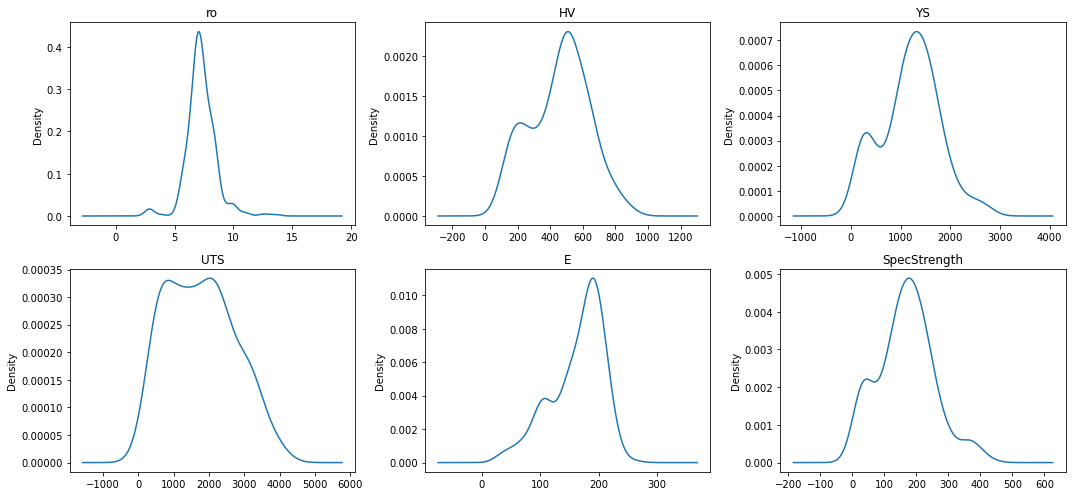

In [14]:
# Features - propriedades mecânicas
fig, axes = plt.subplots(2, 3, figsize=(15,7))
colunas = ['ro', 'HV', 'YS', 'UTS', 'E', 'SpecStrength']

for ax, coluna in zip(axes.flatten(), colunas):
    df[coluna].plot(kind='kde', ax=ax, title=coluna)

plt.tight_layout()
plt.show()

In [15]:
# Esses valores estão dentro de Specific Strength
df.drop(columns = ['ro','YS'], inplace = True)

In [16]:
# Como a liga que queremos não tiveram ensaios realizados, não teremos os valores de UTS, elong e E.
df_final = df.drop(columns = ['UTS', 'elong','E'])
df_final

,Nome,Co,Fe,Ni,Si,Al,Cr,Mo,Nb,Ti,...,Mg,Zn,Sc,Hf,Ta,W,phases,HV,test,SpecStrength
0,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,FCC,125.0,C,24.000000
1,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,FCC,125.0,C,24.588235
2,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,FCC,NaN,T,24.823529
3,CoFeNiSi0.25,30.769231,30.769231,30.769231,7.692308,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,FCC,149.0,C,25.454545
4,CoFeNiSi0.5,28.571429,28.571429,28.571429,14.285714,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,FCC + Im,287.0,C,67.042254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,CoFeMoNi1.8V,17.241379,17.241379,31.034483,0.000000,0.0,0.0,17.241379,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,FCC + Im,510.0,NaN,NaN
353,CoFeMoNi2V,16.666667,16.666667,33.333333,0.000000,0.0,0.0,16.666667,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,FCC + Im,382.0,NaN,NaN
354,CoFeMoNiTiVZr,14.285714,14.285714,14.285714,0.000000,0.0,0.0,14.285714,0.0,14.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,790.0,NaN,NaN
355,CuFeNiTiVZr,0.000000,16.666667,16.666667,0.000000,0.0,0.0,0.000000,0.0,16.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,590.0,NaN,NaN


#### Dropar os nulos e a coluna test

In [17]:
# Dropar os nulos de phases
#df_final.drop(columns = ['test'], inplace = True)
df_final.dropna(subset = ["phases"], inplace = True)

In [18]:
# Dropar dados nulos de 'SpecStrength'
df_final = df_final.dropna(subset = ['SpecStrength'])
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 356
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nome          180 non-null    object 
 1   Co            180 non-null    float64
 2   Fe            180 non-null    float64
 3   Ni            180 non-null    float64
 4   Si            180 non-null    float64
 5   Al            180 non-null    float64
 6   Cr            180 non-null    float64
 7   Mo            180 non-null    float64
 8   Nb            180 non-null    float64
 9   Ti            180 non-null    float64
 10  C             180 non-null    float64
 11  V             180 non-null    float64
 12  Zr            180 non-null    float64
 13  Mn            180 non-null    float64
 14  Cu            180 non-null    float64
 15  B             180 non-null    float64
 16  Y             180 non-null    float64
 17  Sn            180 non-null    float64
 18  Li            180 non-null    

#### 'HV' tem poucos dados, fazer imputer com a mediana e fazer scaling 

In [19]:
# Imputer de mediana para HV - talvez não tenha sido o melhor imputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "mean")
df_final[["HV"]] = imputer.fit_transform(df_final[["HV"]])

<ipython-input-19-ec3e2e873acd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[["HV"]] = imputer.fit_transform(df_final[["HV"]])
C:\Users\gabri\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [20]:
# Standard Scaler para 'HV'
from sklearn.preprocessing import StandardScaler

# Instanciando o encoder.
standard_scaler = StandardScaler()

# Treinando o encoder e transformando os dados de entrada.
df_final[["HV"]] = standard_scaler.fit_transform(df_final[["HV"]])

<ipython-input-20-be40107bb79e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[["HV"]] = standard_scaler.fit_transform(df_final[["HV"]])
C:\Users\gabri\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [21]:
df_final

,Nome,Co,Fe,Ni,Si,Al,Cr,Mo,Nb,Ti,...,Mg,Zn,Sc,Hf,Ta,W,phases,HV,test,SpecStrength
0,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.0,0.0,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,FCC,-2.689470e+00,C,24.000000
1,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.0,0.0,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,FCC,-2.689470e+00,C,24.588235
2,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.0,0.0,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,FCC,-5.231702e-16,T,24.823529
3,CoFeNiSi0.25,30.769231,30.769231,30.769231,7.692308,0.0,0.0,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,FCC,-2.468581e+00,C,25.454545
4,CoFeNiSi0.5,28.571429,28.571429,28.571429,14.285714,0.0,0.0,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,FCC + Im,-1.198469e+00,C,67.042254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,NbTiV0.3Mo1.5Zr,0.000000,0.000000,0.000000,0.000000,0.0,0.0,31.25,20.833333,20.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,BCC,-5.231702e-16,C,210.133333
337,NbTiVZr,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00,25.000000,25.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,BCC,-5.231702e-16,C,169.846154
338,NbTiVZr,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00,25.000000,25.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,BCC,-7.566912e-01,C,170.000000
339,NbTiV2Zr,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00,20.000000,20.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,BCC,-1.042006e+00,C,143.437500


In [22]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 356
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nome          180 non-null    object 
 1   Co            180 non-null    float64
 2   Fe            180 non-null    float64
 3   Ni            180 non-null    float64
 4   Si            180 non-null    float64
 5   Al            180 non-null    float64
 6   Cr            180 non-null    float64
 7   Mo            180 non-null    float64
 8   Nb            180 non-null    float64
 9   Ti            180 non-null    float64
 10  C             180 non-null    float64
 11  V             180 non-null    float64
 12  Zr            180 non-null    float64
 13  Mn            180 non-null    float64
 14  Cu            180 non-null    float64
 15  B             180 non-null    float64
 16  Y             180 non-null    float64
 17  Sn            180 non-null    float64
 18  Li            180 non-null    

In [23]:
# Separação de inputs e target
X = df_final.drop(["SpecStrength", "Nome"], axis = 1)
y = df_final[['SpecStrength']]

In [24]:
X["HV"].describe()

count    1.800000e+02
mean    -2.582578e-16
std      1.002789e+00
min     -2.689470e+00
25%     -5.231702e-16
50%     -5.231702e-16
75%      2.764250e-01
max      4.020033e+00
Name: HV, dtype: float64

<AxesSubplot:ylabel='Density'>

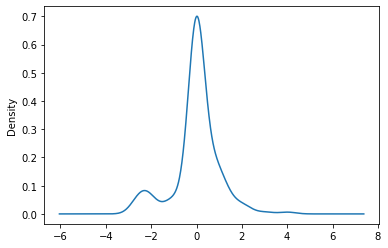

In [25]:
# Alterou o formato
X['HV'].plot(kind="kde")

# One Hot Encoder
Transforma cada uma das categorias em dados binários em colunas distintas  
Aplicar o OHE após separação de dados

In [26]:
# variáveis categóricas
X_cat = X[['phases','test']]

In [27]:
# Aplicar o One Hot Encoder antes do split
from sklearn.preprocessing import OneHotEncoder

# Instanciar e treinar
encoder = OneHotEncoder(drop='first', sparse = False)
one_hot_encoded = encoder.fit_transform(X_cat)

# transformar em DataFrame
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['phases','test']))

# Parear os índices dos dois FrameWorks para concatenação
ind = one_hot_df.index
df_final.set_index(ind,inplace=True)

# Concatenar e dropar inputs categóricos
df_encoded = pd.concat([df_final, one_hot_df], axis = 1)
df_encoded = df_encoded.drop(['phases','test'], axis = 1)

In [28]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Nome                   180 non-null    object 
 1   Co                     180 non-null    float64
 2   Fe                     180 non-null    float64
 3   Ni                     180 non-null    float64
 4   Si                     180 non-null    float64
 5   Al                     180 non-null    float64
 6   Cr                     180 non-null    float64
 7   Mo                     180 non-null    float64
 8   Nb                     180 non-null    float64
 9   Ti                     180 non-null    float64
 10  C                      180 non-null    float64
 11  V                      180 non-null    float64
 12  Zr                     180 non-null    float64
 13  Mn                     180 non-null    float64
 14  Cu                     180 non-null    float64
 15  B     

# Salvando o DataFrame limpo e preparado
df_encoded.to_csv("df_encoded.csv")

In [3]:
df_encoded = pd.read_csv("df_encoded.csv")
df_encoded

,Unnamed: 0,Nome,Co,Fe,Ni,Si,Al,Cr,Mo,Nb,...,phases_BCC + Im,phases_BCC + lm,phases_BCC+HCP,phases_FCC,phases_FCC + BCC,phases_FCC + BCC + B2,phases_FCC + BCC + Im,phases_FCC + HCP + Im,phases_FCC + Im,test_T
0,0,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.0,0.0,0.00,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.0,0.0,0.00,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.0,0.0,0.00,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,CoFeNiSi0.25,30.769231,30.769231,30.769231,7.692308,0.0,0.0,0.00,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,CoFeNiSi0.5,28.571429,28.571429,28.571429,14.285714,0.0,0.0,0.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,175,NbTiV0.3Mo1.5Zr,0.000000,0.000000,0.000000,0.000000,0.0,0.0,31.25,20.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176,176,NbTiVZr,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00,25.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177,177,NbTiVZr,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00,25.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
178,178,NbTiV2Zr,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00,20.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Configurar os inputs dos targets
y = df_encoded["SpecStrength"]
X = df_encoded.drop(columns = ["Nome","SpecStrength"])

In [5]:
X.columns

Index(['Unnamed: 0', 'Co', 'Fe', 'Ni', 'Si', 'Al', 'Cr', 'Mo', 'Nb', 'Ti', 'C',
       'V', 'Zr', 'Mn', 'Cu', 'B', 'Y', 'Sn', 'Li', 'Mg', 'Zn', 'Sc', 'Hf',
       'Ta', 'W', 'HV', 'phases_BCC', 'phases_BCC + B2', 'phases_BCC + Im',
       'phases_BCC + lm', 'phases_BCC+HCP', 'phases_FCC', 'phases_FCC + BCC',
       'phases_FCC + BCC + B2', 'phases_FCC + BCC + Im',
       'phases_FCC + HCP + Im', 'phases_FCC + Im', 'test_T'],
      dtype='object')

In [6]:
#### separar os dados de treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 88 to 179
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             144 non-null    int64  
 1   Co                     144 non-null    float64
 2   Fe                     144 non-null    float64
 3   Ni                     144 non-null    float64
 4   Si                     144 non-null    float64
 5   Al                     144 non-null    float64
 6   Cr                     144 non-null    float64
 7   Mo                     144 non-null    float64
 8   Nb                     144 non-null    float64
 9   Ti                     144 non-null    float64
 10  C                      144 non-null    float64
 11  V                      144 non-null    float64
 12  Zr                     144 non-null    float64
 13  Mn                     144 non-null    float64
 14  Cu                     144 non-null    float64
 15  B    

#### Aplicar modelo de regressão - Lasso

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [33]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(alpha=10).fit(X_train, y_train)

In [34]:
# predict y_hat with x_test
y_hat = lasso.predict(X_test)
y_hat

array([131.52837435, 200.32749438, 116.58967146, 182.1664943 ,
        92.17087655, 246.05677798, 191.73970962, 145.56040679,
       154.60971007, 141.60027145, 345.02515824, 140.07868289,
       230.53799973, 190.14553484, 183.2174856 ,  30.9163982 ,
       201.89280205, 242.66358843, 224.65090089, -59.82585602,
       144.42083902,  76.53870676, 143.76754196, 110.23049583,
       145.40514298, 116.69360225, 103.27685838,  78.91348673,
       186.3811524 , 202.0195515 , 116.27171195, 176.98697699,
       212.61004706, 199.75820324, 201.76605259,  97.13098125])

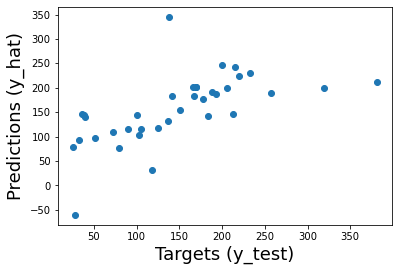

In [35]:
# Check with a plot
plt.scatter(y_test, y_hat)
plt.xlabel("Targets (y_test)", size = 18)
plt.ylabel("Predictions (y_hat)", size = 18)
plt.show()

C:\Users\gabri\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

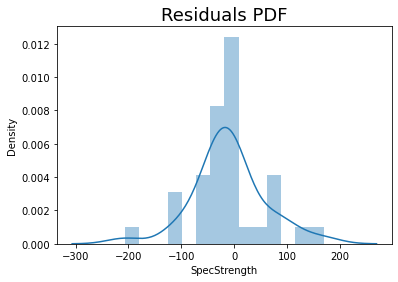

In [36]:
# Resíduos
sns.distplot(y_test - y_hat)
plt.title("Residuals PDF", size=18)

In [37]:
lasso.score(X_test, y_test) # Our model explain 30.9% of the variability of the data

0.3087161237514149

-----

### Conclusion

An analysis utilizing a dataset comprising only 180 samples, with inputs including chemical composition fractions, 16 phase types, Vickers hardness, and the type of test performed (compression or tensile), and employing a linear model with Lasso regularization, achieved an $𝑅^2$ value of 31%.

It is recommended to augment the dataset with additional samples and incorporate supplementary features that may have a significant impact, such as criteria related to High-Entropy Alloys (HEA), cold working, and thermal treatments.

Furthermore, to enhance the accuracy of the results, it is essential to apply appropriate data transformations, including scaling and One Hot Encoding. These preprocessing steps are crucial for improving model performance and ensuring more reliable outcomes.

----

### Usando regularização - função abaixo

#### Polynomial features com regularização

In [46]:
from ML_HEA_models import *


Feature space transformed


Original features: 38

Transformed features: 779

Evaluation metrics for train:



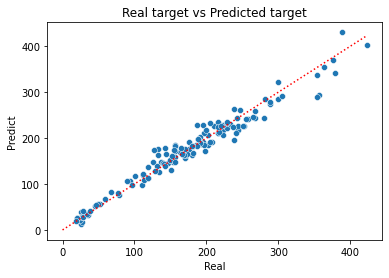

R2: 0.96
R2 adjusted: 1.01
MAE: 12.90
RMSE: 17.57

Residual distribution of train:

count    1.440000e+02
mean     1.776357e-15
std      1.762687e+01
min     -4.717524e+01
25%     -8.827837e+00
50%     -2.982011e-01
75%      9.309408e+00
max      6.321734e+01
Name: SpecStrength, dtype: float64


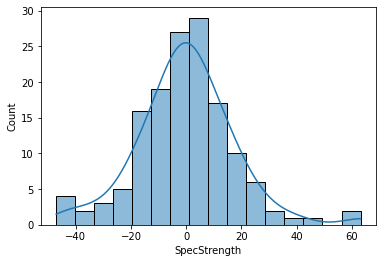


##################################################

Evaluation metrics for test:



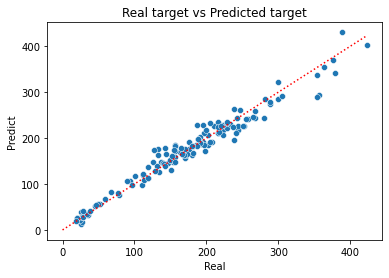

R2: 0.96
R2 adjusted: 1.01
MAE: 12.90
RMSE: 17.57

Residual distribution of test:

count    1.440000e+02
mean     1.776357e-15
std      1.762687e+01
min     -4.717524e+01
25%     -8.827837e+00
50%     -2.982011e-01
75%      9.309408e+00
max      6.321734e+01
Name: SpecStrength, dtype: float64


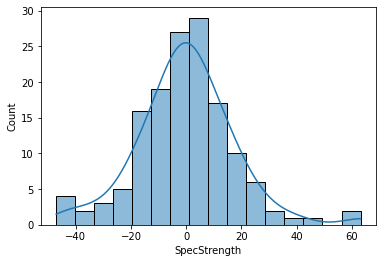

(Lasso(alpha=0.1),
 {'r2': 0.9592720595063663,
  'r2_adj': 1.009157382846839,
  'mae': 12.901393806743032,
  'rmse': 17.565554515172607},
 {'r2': 0.9592720595063663,
  'r2_adj': 1.009157382846839,
  'mae': 12.901393806743032,
  'rmse': 17.565554515172607})

In [48]:
# Using polynomial degree 2, Lasso regularization, alpha = 0.1
regression_poly_features_regularized(X_train, y_train, X_test, y_test,
                                         deg = 2,
                                         type_regularization = "l1",
                                         alpha = 0.1,
                                         iter_max = 1000,
                                         plot = True, scale_mms = False,
                                         train_metrics = True, # Trocar isso
                                         dist_resids = True,
                                         plot_model = True)